# UNSW_NB15 

The UNSW-NB15 dataset was created by the Australian Centre for Cyber Security (ACCS) in 2015.

It is one of the most widely used benchmark datasets for network intrusion detection research.

# Dataset Overview:
 - Contains real modern normal traffic mixed with synthetic attack activities.
 - Collected using the IXIA PerfectStorm tool, which generates realistic network traffic.
 - Includes 49 features (flow-based, basic, content-based, time-based, and additional generated features).
 - Covers 9 different attack categories (e.g., Fuzzers, Analysis, Backdoors, DoS, Exploits, Generic, Reconnaissance, Shellcode, Worms).
 - Also contains normal traffic for comparison.

# Study Focus:
 This study is focused on building a detection system using the UNSW-NB15 dataset.
 The goal is to distinguish between normal network traffic and malicious traffic across multiple attack categories.

The following code section (#UNSW_NB15 Processing) is responsible for:
 1. Loading the dataset (CSV files provided by ACCS).
 2. Cleaning and preprocessing data (handling missing values, encoding categorical features, scaling).
 3. Preparing the dataset for training intrusion detection models.


In [3]:
#Library Imports

#Data Handling and analysis
import pandas as pd
import numpy as np

#Visualisation
import seaborn as sns #For creating statistical and heatmap visualisations
import matplotlib.pyplot as plt

# Utilities
import time

# Data Preprocessing
from sklearn.preprocessing import LabelEncoder

# Machine Learning Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Unsupervised Learning
from sklearn.cluster import KMeans

from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay, roc_auc_score, plot_roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE



In [5]:
# Load the UNSW-NB15 Dataset

df_train = pd.read_csv("UNSW_NB15_training-set.csv")
df_test = pd.read_csv("UNSW_NB15_testing-set.csv")
print("Length of training set: ", len(df_train))
print("Length of testing set: ", len(df_test))

Length of training set:  175341
Length of testing set:  82332


In [6]:
df = pd.concat([df_train, df_test])
# information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 257673 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 257673 non-null  int64  
 1   dur                257673 non-null  float64
 2   proto              257673 non-null  object 
 3   service            257673 non-null  object 
 4   state              257673 non-null  object 
 5   spkts              257673 non-null  int64  
 6   dpkts              257673 non-null  int64  
 7   sbytes             257673 non-null  int64  
 8   dbytes             257673 non-null  int64  
 9   rate               257673 non-null  float64
 10  sttl               257673 non-null  int64  
 11  dttl               257673 non-null  int64  
 12  sload              257673 non-null  float64
 13  dload              257673 non-null  float64
 14  sloss              257673 non-null  int64  
 15  dloss              257673 non-null  int64  
 16  sin

In [7]:
df.describe(include="all")

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
count,257673.000000,257673.000000,257673,257673,257673,257673.000000,257673.000000,2.576730e+05,2.576730e+05,2.576730e+05,...,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673,257673.000000
unique,NaN,NaN,133,13,11,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN
top,NaN,NaN,tcp,-,FIN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal,NaN
freq,NaN,NaN,123041,141321,117164,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93000,NaN
mean,72811.823858,1.246715,NaN,NaN,NaN,19.777144,18.514703,8.572952e+03,1.438729e+04,9.125391e+04,...,4.032677,8.322964,0.012819,0.012850,0.132005,6.800045,9.121049,0.014274,NaN,0.639077
std,48929.917641,5.974305,NaN,NaN,NaN,135.947152,111.985965,1.737739e+05,1.461993e+05,1.603446e+05,...,5.831515,11.120754,0.116091,0.116421,0.681854,8.396266,10.874752,0.118618,NaN,0.480269
min,1.000000,0.000000,NaN,NaN,NaN,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,NaN,0.000000
25%,32210.000000,0.000008,NaN,NaN,NaN,2.000000,0.000000,1.140000e+02,0.000000e+00,3.078928e+01,...,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,NaN,0.000000
50%,64419.000000,0.004285,NaN,NaN,NaN,4.000000,2.000000,5.280000e+02,1.780000e+02,2.955665e+03,...,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000,NaN,1.000000
75%,110923.000000,0.685777,NaN,NaN,NaN,12.000000,10.000000,1.362000e+03,1.064000e+03,1.250000e+05,...,3.000000,8.000000,0.000000,0.000000,0.000000,8.000000,11.000000,0.000000,NaN,1.000000


In [8]:
df.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


In [9]:
#Checking for duplicates¶

print(df.duplicated().sum())

0


In [10]:
#Checking for missing values
print(df.isna().sum())

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

<AxesSubplot:>

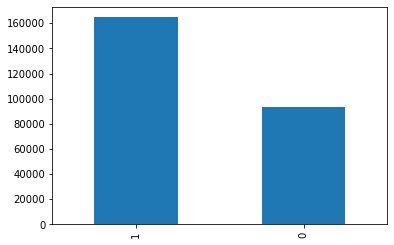

In [11]:
#Checking the balance between benign and attack data

df['label'].value_counts().plot.bar()

In [12]:
df['label'].value_counts(normalize=True)

#The ratio between attack and normal data is not equal, but just slightly imbalanced. 
#Therefore, we will not do a sampling fix here.


1    0.639077
0    0.360923
Name: label, dtype: float64

# Feature engineering
Dropping unnecessary features¶
The first column we will drop is id. This is just for identification, so we can remove this column.

This is a binary classification problem, so we only use column label to classify attack (1) or normal (0). Then, we do not need attack details in attack_cat

In [13]:
#Drop Unnecessary Columns

df = df.drop(columns=['id', 'attack_cat'])

In [14]:
df_cat = df.select_dtypes(exclude=[np.number])
print(df_cat.columns)
for feature in df_cat.columns:
    df[feature] = LabelEncoder().fit_transform(df[feature])

Index(['proto', 'service', 'state'], dtype='object')


In [15]:
df.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
0,0.121478,113,0,4,6,4,258,172,74.087490,252,...,1,1,1,0,0,0,1,1,0,0
1,0.649902,113,0,4,14,38,734,42014,78.473372,62,...,1,1,2,0,0,0,1,6,0,0
2,1.623129,113,0,4,8,16,364,13186,14.170161,62,...,1,1,3,0,0,0,2,6,0,0
3,1.681642,113,3,4,12,12,628,770,13.677108,62,...,1,1,3,1,1,0,2,1,0,0
4,0.449454,113,0,4,10,6,534,268,33.373826,254,...,2,1,40,0,0,0,2,39,0,0


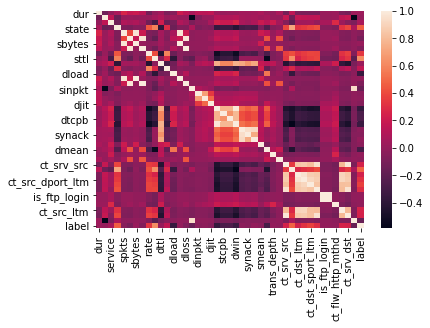

In [16]:
#Data Correlation¶
#Removing highly correlated features.

sns.heatmap(df.corr())
plt.show()

In [17]:
columns = df.columns.tolist()
corr = df.corr()
correlated_vars = []
for i in range(len(columns) - 1):
    for j in range(i+1, len(columns)):
        if corr[columns[i]][columns[j]] > 0.98:
            print(columns[i], columns[j], corr[columns[i]][columns[j]])
            correlated_vars.append(columns[j])

sbytes sloss 0.9957715772406215
dbytes dloss 0.9967111338320517
swin dwin 0.9804584289089485
is_ftp_login ct_ftp_cmd 0.9988554882922012


In [19]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['label'])
feature_list = list(X.columns)
X = np.array(X)
y = df['label']

# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
print("Training set:", len(X_train))
print("Testing set:", len(X_test))

Training set: 206138
Testing set: 51535


In [22]:
#Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
#Model Training

models = {}
models['Decision Tree Classifier'] = DecisionTreeClassifier()
models['Random Forest Classifier'] = RandomForestClassifier()
models['Gaussian Naive Bayes'] = GaussianNB()

In [26]:
train_score, accuracy, precision, recall, training_time, y_pred = {}, {}, {}, {}, {}, {}
for key in models.keys():
    start_time = time.time()
    models[key].fit(X_train, y_train)
    training_time[key] = time.time() - start_time
    
    y_pred[key] = models[key].predict(X_test)
    
    train_score[key] = models[key].score(X_train, y_train)
    accuracy[key] = models[key].score(X_test, y_test)
    precision[key] = precision_score(y_test, y_pred[key])
    recall[key] = recall_score(y_test, y_pred[key])

In [27]:
from sklearn.feature_selection import RFE


rfc_rfe = 'Random Forest Classifier + Recursive Feature Elimination'
models[rfc_rfe] = RandomForestClassifier()
rfe = RFE(models[rfc_rfe])
start_time = time.time()
rfe.fit(X_train, y_train)
training_time[rfc_rfe] = time.time() - start_time

X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

start_time = time.time()
models[rfc_rfe].fit(X_train_rfe, y_train)
training_time[rfc_rfe] = training_time[rfc_rfe] + (time.time() - start_time)
    
y_pred[key] = models[rfc_rfe].predict(X_test_rfe)
    
train_score[rfc_rfe] = models[rfc_rfe].score(X_train_rfe, y_train)
accuracy[rfc_rfe] = models[rfc_rfe].score(X_test_rfe, y_test)
precision[rfc_rfe] = precision_score(y_test, y_pred[key])
recall[rfc_rfe] = recall_score(y_test, y_pred[key])


In [28]:
print("Old number of features:", X.shape[1])
print("New number of features:", len(rfe.estimator_.feature_importances_))

Old number of features: 42
New number of features: 21


In [29]:
#Models comparison

df_models = pd.DataFrame(index=models.keys(), columns=['Training score', 'Accuracy', 'Precision', 'Recall', 'Training time'])
df_models['Training score'] = train_score.values()
df_models['Accuracy'] = accuracy.values()
df_models['Precision'] = precision.values()
df_models['Recall'] = recall.values()
df_models['Training time'] = training_time.values()

In [30]:
df_models

,Training score,Accuracy,Precision,Recall,Training time
Decision Tree Classifier,0.997696,0.937479,0.950382,0.951826,2.682616
Random Forest Classifier,0.997696,0.952110,0.963277,0.961697,29.829959
Gaussian Naive Bayes,0.819388,0.817871,0.855421,0.860306,0.161343
Random Forest Classifier + Recursive Feature Elimination,0.995120,0.949413,0.958804,0.962153,640.388542


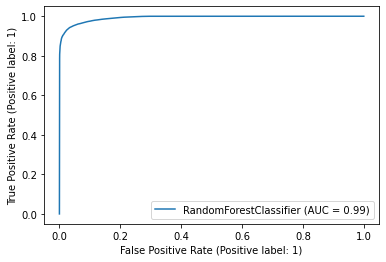

In [31]:
display = RocCurveDisplay.from_estimator(models['Random Forest Classifier'], X_test, y_test)
plt.show()

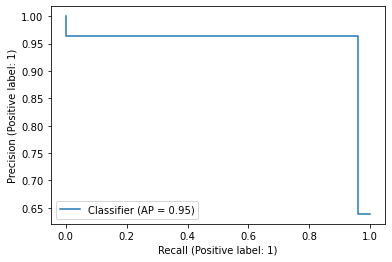

In [32]:
display = PrecisionRecallDisplay.from_predictions(y_test, y_pred['Random Forest Classifier'])

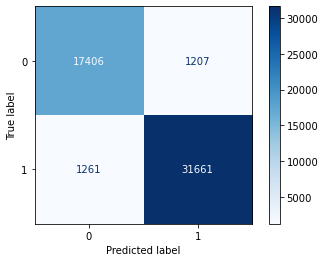

In [33]:
cm = confusion_matrix(y_test, y_pred['Random Forest Classifier'], labels=models['Random Forest Classifier'].classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=models['Random Forest Classifier'].classes_)
disp.plot(cmap='Blues')
plt.show()